In [2]:
import rasterio
import fiona
import rasterio.mask as mask
from rasterio.merge import merge
import numpy as np
from matplotlib import pyplot as plt
import queue

In [3]:
def listNeighbors(u, v, width, height):
    if (u < 0 or u >= height or v < 0 or v >= width):
        return None
    direction = [-1, 0, 1]
    _listNeighbors = []
    for i in range(len(direction)):
        for j in range(len(direction)):
            newU = u + direction[i]
            newV = v + direction[j]
            if (newU == u and newV == v):
                continue
            if (newU >= 0 and newU < height and newV >= 0 and newV < width):
                _listNeighbors.append([newU, newV])
    return _listNeighbors

In [4]:
def dfs(mat, u, v, visited, label):
    visited[u][v] = label
    #print('visited[%d, %d] = %d' % (u, v, label))
    for neighbor in listNeighbors(u, v, mat.shape[1], mat.shape[0]):
        if visited[neighbor[0]][neighbor[1]] == 0 and mat[neighbor[0]][neighbor[1]] == 1:
            dfs(mat, neighbor[0], neighbor[1], visited, label)

In [5]:
def bfs(mat, u, v, visited, label):
    cnt = 0
    q = queue.Queue()
    q.put([u,v])
    visited[u][v] = label
    while not q.empty():
        cnt+=1
        current = q.get()
        for neighbor in listNeighbors(current[0], current[1], mat.shape[1], mat.shape[0]):
            if visited[neighbor[0]][neighbor[1]] == 0 and mat[neighbor[0]][neighbor[1]] == 1:
                visited[neighbor[0]][neighbor[1]] = label
                q.put(neighbor)

In [6]:
def findConnectedElements(mat):
    visited = np.zeros(mat.shape)
    label = 1
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if (mat[i][j] == 1 and visited[i][j] == 0):
                bfs(mat, i, j, visited, label)
                label += 1
    return visited, label

In [7]:
def findLargestConnectedElement(visited, label):
    sz = np.zeros(label)
    for i in range(visited.shape[0]):
        for j in range(visited.shape[1]):
            sz[int(visited[i][j])] += 1
    sz[0] = -1
    return np.argmax(sz)

In [8]:
def maskOutLake(watermask):
    visited, label = findConnectedElements(watermask)
    largestElement = findLargestConnectedElement(visited, label)
    maskLake = np.zeros(watermask.shape)
    for i in range(watermask.shape[0]):
        for j in range(watermask.shape[1]):
            if visited[i][j] == largestElement:
                maskLake[i][j] = 1
    return maskLake

In [9]:
def maskWater(vh, offset = -22):
    maskwater = np.zeros(vh.shape)
    for i in range(vh.shape[0]):
        for j in range(vh.shape[1]):
            if vh[i][j] < offset:
                maskwater[i][j] = 1
    return maskwater

In [10]:
def countPixel(mat):
    cnt = 0
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if mat[i][j] == 1:
                cnt += 1
    return cnt

In [11]:
def createMaskLake(imgDir):
    ds = rasterio.open(imgDir)
    band = ds.read()
    waterMask = maskWater(band[0])
    return maskOutLake(waterMask)

In [12]:
maskTonlesap = createMaskLake('merge_resampled.tif')

RasterioIOError: merge_resampled.tif: No such file or directory

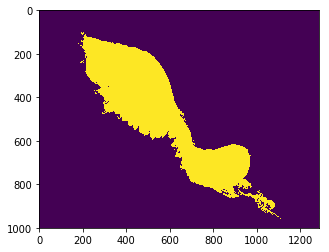

In [12]:
plt.imshow(maskTonlesap)